# Анализ времянных рядов

**Анализ временных рядов** — это статистический метод, применяемый для анализа данных, которые собраны в различные моменты времени, и выявления структурных характеристик, таких как тренды, сезонные колебания и циклические изменения. Временной ряд в статистике и эконометрике представляет собой последовательность наблюдений, зафиксированных через равные промежутки времени.

### Основные задачи анализа временных рядов:

1. **Описание и понимание**:
   - **Визуализация**: Графическое представление временного ряда помогает выявить тенденции и сезонные колебания.
   - **Сглаживание**: Использование различных методов сглаживания для выделения основного сигнала временного ряда без учета шума.

2. **Компонентный анализ**:
   - **Trend (Тренд)**: Линейные и нелинейные тенденции в данных, которые появляются в долгосрочной перспективе.
   - **Seasonality (Сезонность)**: Повторяющиеся и предсказуемые изменения, которые повторяются через регулярные промежутки времени.
   - **Cycle (Циклы)**: Долгосрочные колебания, не связанные с сезонностью, показывающие экономические циклы.
   - **Noise (Шум)**: Случайные и непредсказуемые изменения данных.

3. **Прогнозирование**:
   - Построение моделей для предсказания будущих значений временного ряда на основе предыдущих наблюдений. Популярные методы прогнозирования включают в себя модели ARIMA, SARIMA, Holt-Winters и другие.

4. **Детектирование аномалий**:
   - Обнаружение и анализ необычных значений или выбросов, которые могут указывать на важные события или ошибки в данных.

### Зачем нужен анализ временных рядов?

1. **Экономические прогнозы**:
   - Прогнозирование макроэкономических показателей, таких как ВВП, инфляция, процентные ставки, рыночные курсы и т.д. Это помогает принимать обоснованные решения по экономической политике и бизнес-стратегии.

2. **Финансовый анализ**:
   - Прогноз цен на акции, облигации, валютные курсы и другие финансовые инструменты. Временные ряды помогают выявлять рыночные тренды и делать обоснованные инвестиционные решения.

3. **Управление запасами**:
   - Прогнозирование спроса для оптимизации уровня запасов на складах. Это помогает снизить издержки на хранение и минимизировать дефицит продукции.

4. **Обслуживание и производство**:
   - Анализ временных рядов используется для планирования технического обслуживания оборудования и прогнозирования возможных отказов, что может сэкономить ресурсы и повысить эффективность производства.

5. **Метеорология и климатология**:
   - Прогнозирование погодных условий и изменения климата на основе исторических данных о температуре, осадках и других метеорологических показателях.

6. **Энергетика**:
   - Прогнозирование потребления электроэнергии, что помогает оптимизировать мощности генерации и распределения энергии.

### Прогнозирование ВВП России

In [1]:
!pip install statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


### 2. Загрузка данных

Для примера воспользуемся готовым набором данных об экономике, который содержит данные о ВВП:

In [2]:
file_path = '../datasets/API_NY.GDP.MKTP.CD_DS2_ru_csv_v2_797299.csv'

# Загрузка данных
df = pd.read_csv(file_path, skiprows=4)

# Фильтрация данных для России
df_russia = df[df['Country Code'] == 'RUS'].transpose()[4:]
df_russia.columns = ['GDP']

# Преобразование индекса в формат datetime, пропуская ошибочные строки
df_russia.index = pd.to_datetime(df_russia.index, errors='coerce', format='%Y')

# Удаление строк с некорректными датами
df_russia = df_russia.dropna()

# Преобразование значений в числовой формат
df_russia['GDP'] = pd.to_numeric(df_russia['GDP'])

# Вывод первых строк набора данных
print(df_russia.head())

                     GDP
1988-01-01  5.548287e+11
1989-01-01  5.066313e+11
1990-01-01  5.170144e+11
1991-01-01  5.179630e+11
1992-01-01  4.602906e+11


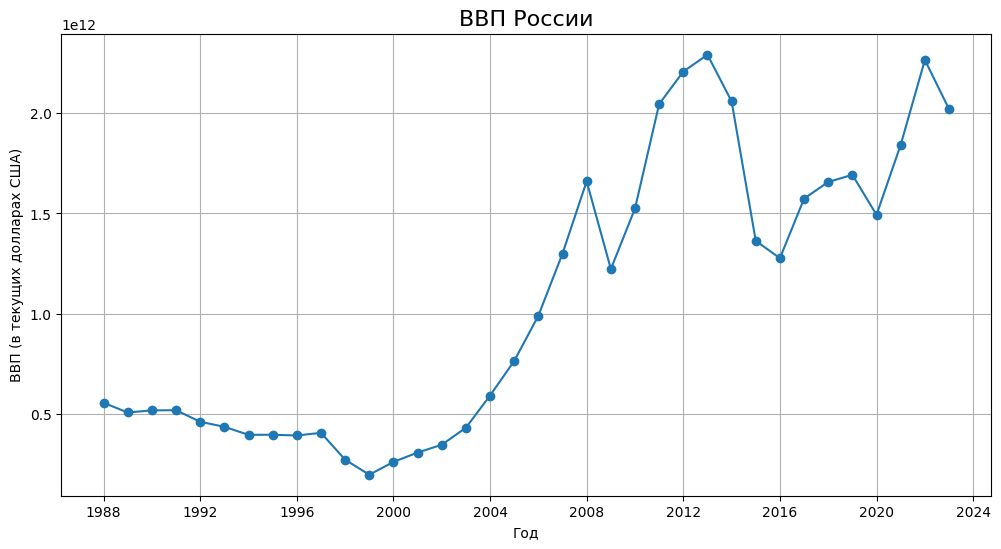

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df_russia.index, df_russia['GDP'], marker='o')
plt.title('ВВП России', fontsize=16)
plt.xlabel('Год')
plt.ylabel('ВВП (в текущих долларах США)')
plt.grid(True)
plt.show()

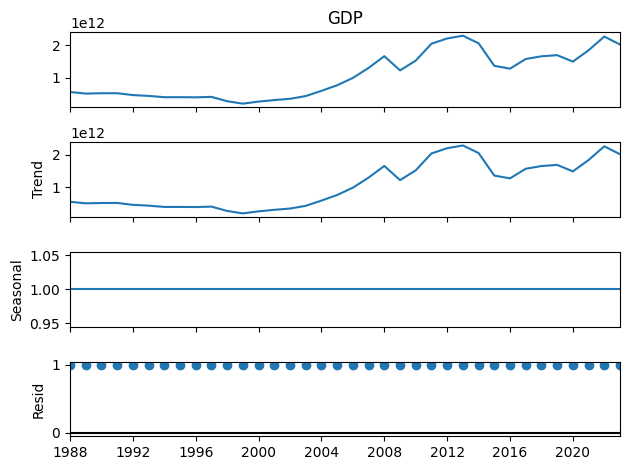

In [4]:
# 4. Декомпозиция временного ряда
result = seasonal_decompose(df_russia['GDP'], model='multiplicative', period=1)

# Визуализация компонентов
result.plot()
plt.show()

In [5]:
# 5. Проверка на стационарность (Тест Дики-Фуллера)
result_adf = adfuller(df_russia['GDP'], autolag='AIC')

print('Статистика ADF: %f' % result_adf[0])
print('p-значение: %f' % result_adf[1])
print('Критические значения:')
for key, value in result_adf[4].items():
    print('\t%s: %.3f' % (key, value))

# Интерпретация результатов теста Дики-Фуллера
alpha = 0.05
if result_adf[1] <= alpha:
    print("Отвергаем нулевую гипотезу (ряд стационарен).")
else:
    print("Не можем отвергнуть нулевую гипотезу (ряд не стационарен).")

Статистика ADF: -0.649983
p-значение: 0.859283
Критические значения:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Не можем отвергнуть нулевую гипотезу (ряд не стационарен).


In [6]:
offset_years = 6

In [7]:
# 6. Создание и тренировка модели ARIMA
# Разделение на тренировочный и тестовый наборы данных
train = df_russia[:(len(df_russia)-offset_years)]
test = df_russia[(len(df_russia)-offset_years):]

# Установка частоты для разделенных наборов данных
train.index = train.index.to_period('A')
train.index = train.index.to_timestamp('A-DEC')

test.index = test.index.to_period('A')
test.index = test.index.to_timestamp('A-DEC')

# Создание модели ARIMA
model = ARIMA(train['GDP'], order=(5, 1, 0))
model_fit = model.fit()

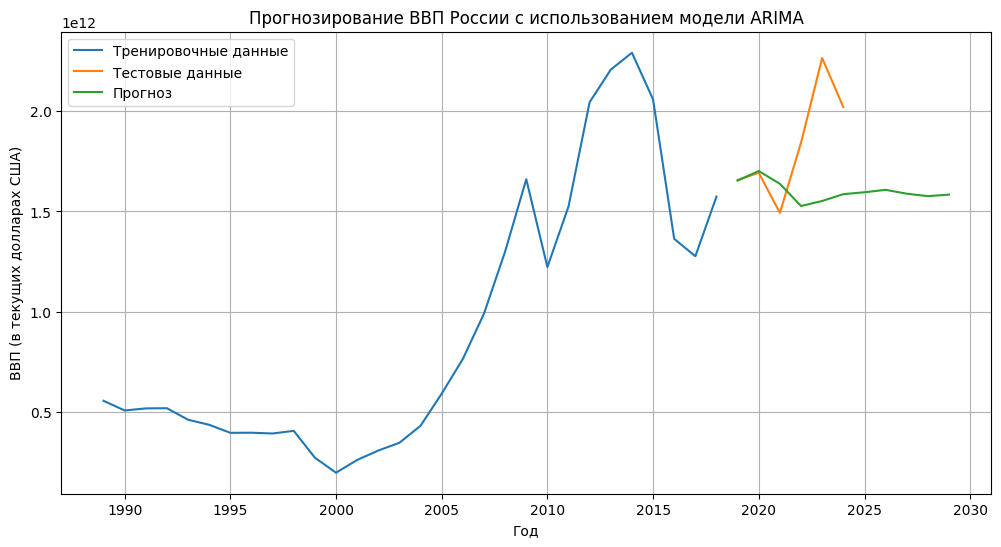

In [8]:
# Прогнозирование
forecast_years = 5
forecast = model_fit.forecast(steps=offset_years + forecast_years)
forecast_index = pd.date_range(start=test.index[0], periods=offset_years + forecast_years, freq='A-DEC')

# Визуализация прогноза и реальных значений
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['GDP'], label='Тренировочные данные')
plt.plot(test.index, test['GDP'], label='Тестовые данные')
plt.plot(forecast.index, forecast, label='Прогноз')
plt.legend()
plt.title('Прогнозирование ВВП России с использованием модели ARIMA')
plt.xlabel('Год')
plt.ylabel('ВВП (в текущих долларах США)')
plt.grid(True)
plt.show()